In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

import requests
from config import weather_api_key

import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

50.511987184177826 -107.12395627920749
-55.76821356887516 51.375920873178785
68.41368742858077 75.9448253484399
-86.8773673384494 177.64319885491886
10.528572509437183 36.97942437411166
75.14230389718165 -149.4394090070201
7.739278712166524 160.73178146757317
3.0450859197116102 4.180505674337525
-77.37216411165633 -93.76135808932398
74.32409750074271 -128.64594078493042
24.891857032430735 149.79325049387944
33.070568594854336 -114.45186253497523
76.30596434523702 157.00034939568684
24.82860963541411 55.54770392959006
-10.899409612354816 -95.71089555400528
-14.631313650902314 87.77057245283885
-3.681595163094457 166.43429272617954
29.04473202829837 -13.147600594314724
-24.798394209995053 -63.18712548691738
-3.3641541564210797 156.67067316811267
53.68857021499136 -173.57095724792393
-89.1576769485916 4.106547241399795
-22.597496818421334 -38.63329491730468
9.115918385595734 62.801739027804274
78.87409993839287 -29.459045897318703
17.649470080765653 64.38165306405455
-16.941177596071356 -

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city, with a pop >= 500 for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [6]:
################   Collect Weather For Cities Using API    #################

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?"
url = url + "units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
  
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | swift current
Processing Record 2 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 1 | novyy urengoy
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | bure
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | yenagoa
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | yuma
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | dubai
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | bengkulu
Processing Record 17 of Set 1 | lata
Processing Record 18 of Set 1 | arrecife
Processing Record 19 of Set 1 | san pedro
Processing Record 20 of Set 1 | kieta
Processing Record 21 of Set 1 | provideniya
Processing Record 22 of Set 1 | hermanus
Processing Recor

Processing Record 37 of Set 4 | skelleftea
Processing Record 38 of Set 4 | constitucion
Processing Record 39 of Set 4 | koumac
Processing Record 40 of Set 4 | saint-francois
Processing Record 41 of Set 4 | the valley
Processing Record 42 of Set 4 | pundaguitan
Processing Record 43 of Set 4 | tyulgan
Processing Record 44 of Set 4 | novyy urgal
Processing Record 45 of Set 4 | andenes
Processing Record 46 of Set 4 | starachowice
Processing Record 47 of Set 4 | hami
Processing Record 48 of Set 4 | teguise
Processing Record 49 of Set 4 | saint-pierre
Processing Record 50 of Set 4 | thompson
Processing Record 1 of Set 5 | sorland
Processing Record 2 of Set 5 | laguna
Processing Record 3 of Set 5 | nome
Processing Record 4 of Set 5 | karratha
Processing Record 5 of Set 5 | asau
Processing Record 6 of Set 5 | boves
Processing Record 7 of Set 5 | mount isa
Processing Record 8 of Set 5 | puerto rico
Processing Record 9 of Set 5 | kitgum
Processing Record 10 of Set 5 | guerrero negro
Processing R

Processing Record 28 of Set 8 | eyl
Processing Record 29 of Set 8 | vokhtoga
Processing Record 30 of Set 8 | gorlice
Processing Record 31 of Set 8 | beringovskiy
Processing Record 32 of Set 8 | roald
Processing Record 33 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 34 of Set 8 | warri
Processing Record 35 of Set 8 | guangyuan
Processing Record 36 of Set 8 | hellvik
Processing Record 37 of Set 8 | norman wells
Processing Record 38 of Set 8 | phalodi
Processing Record 39 of Set 8 | shu
Processing Record 40 of Set 8 | makokou
Processing Record 41 of Set 8 | rexburg
Processing Record 42 of Set 8 | ballina
Processing Record 43 of Set 8 | hambantota
Processing Record 44 of Set 8 | manokwari
Processing Record 45 of Set 8 | muzhi
Processing Record 46 of Set 8 | faanui
Processing Record 47 of Set 8 | itaituba
Processing Record 48 of Set 8 | cove
Processing Record 49 of Set 8 | dakar
Processing Record 50 of Set 8 | la ronge
Processing Record 1 of Set 9 | marcona
City no

Processing Record 16 of Set 12 | camargo
Processing Record 17 of Set 12 | sulina
Processing Record 18 of Set 12 | mahibadhoo
Processing Record 19 of Set 12 | port hawkesbury
Processing Record 20 of Set 12 | vila
Processing Record 21 of Set 12 | yamada
Processing Record 22 of Set 12 | umm lajj
Processing Record 23 of Set 12 | nemuro
Processing Record 24 of Set 12 | tshikapa
Processing Record 25 of Set 12 | anadyr
Processing Record 26 of Set 12 | loharu
Processing Record 27 of Set 12 | aksu
Processing Record 28 of Set 12 | lasa
Processing Record 29 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 30 of Set 12 | inza
Processing Record 31 of Set 12 | glebychevo
Processing Record 32 of Set 12 | auch
Processing Record 33 of Set 12 | caimito
Processing Record 34 of Set 12 | babu
Processing Record 35 of Set 12 | ligayan
Processing Record 36 of Set 12 | arinos
Processing Record 37 of Set 12 | maun
Processing Record 38 of Set 12 | pafos
Processing Record 39 of Set 12 | tigre


In [7]:
# Check # of records in the list of city weather data
len(city_data)

554

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Swift Current,50.2834,-107.8014,2.21,85,100,6.91,CA,2022-11-09 20:46:55
1,Novyy Urengoy,66.0833,76.6333,-6.56,99,28,1.34,RU,2022-11-09 20:50:47
2,Bluff,-46.6000,168.3333,53.80,62,3,5.99,NZ,2022-11-09 20:50:47
3,Bure,10.7000,37.0667,54.82,89,81,5.08,ET,2022-11-09 20:50:48
4,Barrow,71.2906,-156.7887,24.82,86,0,11.50,US,2022-11-09 20:46:00
5,Butaritari,3.0707,172.7902,81.34,79,100,20.98,KI,2022-11-09 20:46:42
6,Yenagoa,4.9247,6.2642,76.42,91,100,4.25,NG,2022-11-09 20:50:48
7,Punta Arenas,-53.1500,-70.9167,53.62,43,40,23.02,CL,2022-11-09 20:47:44
8,Tuktoyaktuk,69.4541,-133.0374,15.80,92,75,5.75,CA,2022-11-09 20:50:11
9,Katsuura,35.1333,140.3000,63.36,66,1,14.56,JP,2022-11-09 20:47:46


In [9]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", 
                    "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Swift Current,CA,2022-11-09 20:46:55,50.2834,-107.8014,2.21,85,100,6.91
1,Novyy Urengoy,RU,2022-11-09 20:50:47,66.0833,76.6333,-6.56,99,28,1.34
2,Bluff,NZ,2022-11-09 20:50:47,-46.6000,168.3333,53.80,62,3,5.99
3,Bure,ET,2022-11-09 20:50:48,10.7000,37.0667,54.82,89,81,5.08
4,Barrow,US,2022-11-09 20:46:00,71.2906,-156.7887,24.82,86,0,11.50
...,...,...,...,...,...,...,...,...,...
549,Shush,IR,2022-11-09 21:04:15,32.1942,48.2436,71.38,64,87,8.43
550,Bouca,CF,2022-11-09 21:04:16,6.5105,18.2733,71.98,86,94,3.51
551,Marsaxlokk,MT,2022-11-09 21:04:16,35.8419,14.5431,64.08,88,0,2.30
552,Mecca,SA,2022-11-09 21:04:16,21.4267,39.8261,76.77,57,72,3.76


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
###############    Plotting Weather Parameters v. Latitude    ##############

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

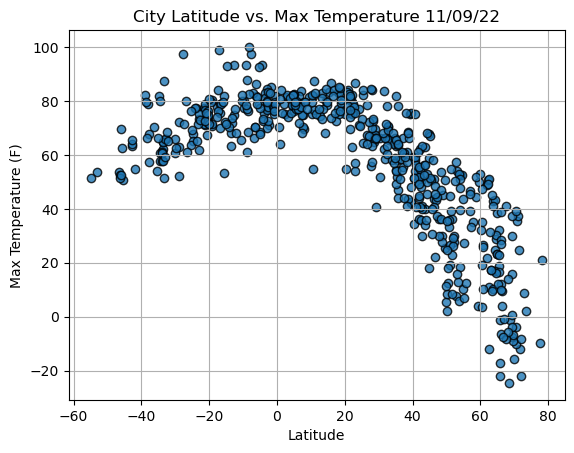

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

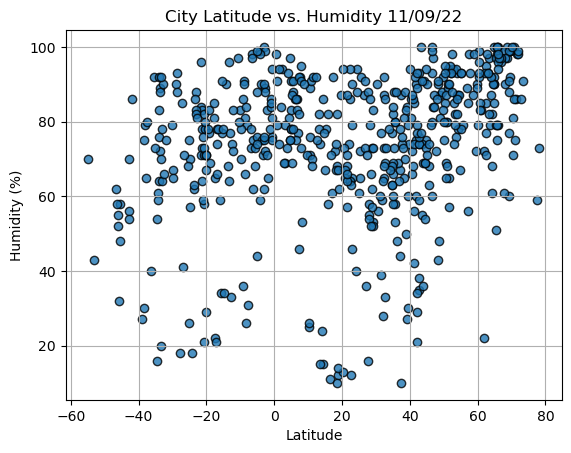

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

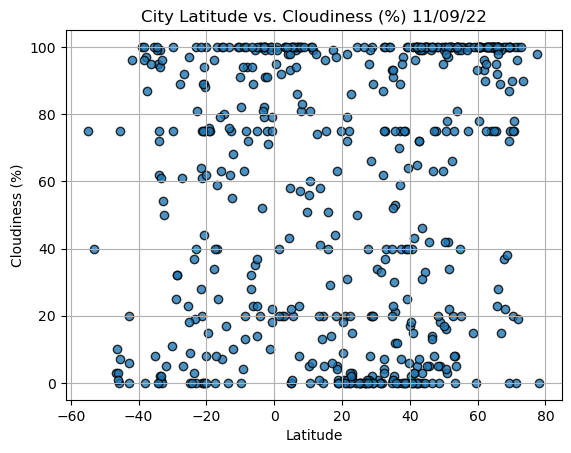

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

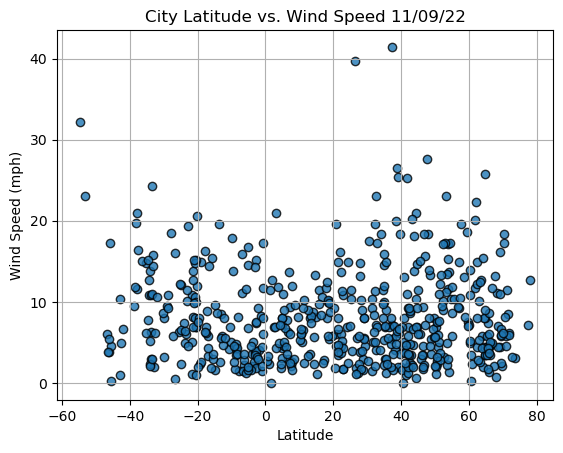

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [57]:
#####################    Linear Regression Function    #####################

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, eq_text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, eq_text_coordinates, fontsize=15, color="red")
    
    # Create string to annotate plot with r-value
    line_r_str = f"The r-value: {r_value:.3f}"
    r_text_coordinates = (eq_text_coordinates[0], eq_text_coordinates[1] - 5)
    # Annotate the text for the r-value
    plt.annotate(line_r_str, r_text_coordinates, fontsize=8, color="red")
    
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]     # Just testing .loc function for an index
index13

City                 Puerto Ayora
Country                        EC
Date          2022-11-09 20:50:49
Lat                       -0.7393
Lng                      -90.3518
Max Temp                    75.16
Humidity                       81
Cloudiness                     18
Wind Speed                   5.99
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()    # Just testing .loc function for a label

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Swift Current,CA,2022-11-09 20:46:55,50.2834,-107.8014,2.21,85,100,6.91
1,Novyy Urengoy,RU,2022-11-09 20:50:47,66.0833,76.6333,-6.56,99,28,1.34
3,Bure,ET,2022-11-09 20:50:48,10.7000,37.0667,54.82,89,81,5.08
4,Barrow,US,2022-11-09 20:46:00,71.2906,-156.7887,24.82,86,0,11.50
5,Butaritari,KI,2022-11-09 20:46:42,3.0707,172.7902,81.34,79,100,20.98


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

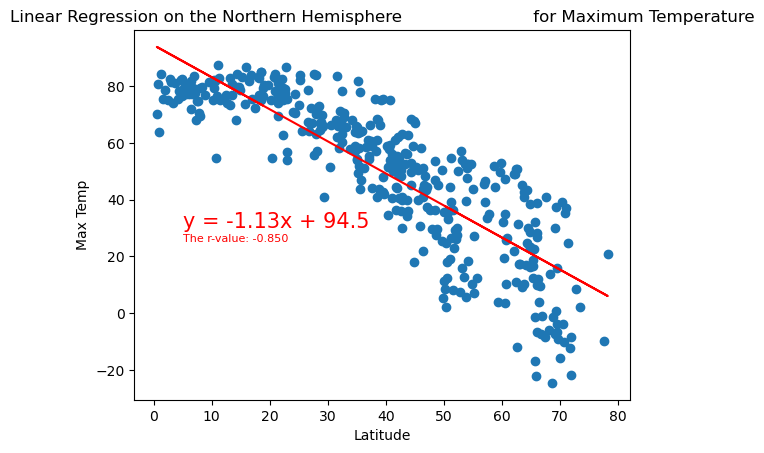

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,30))

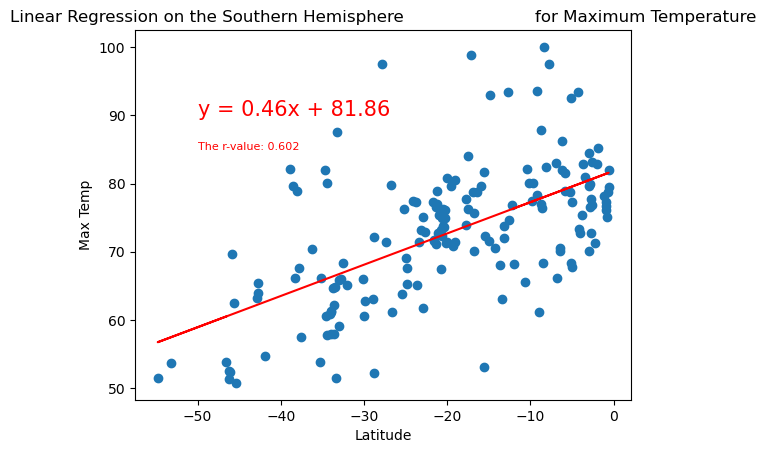

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

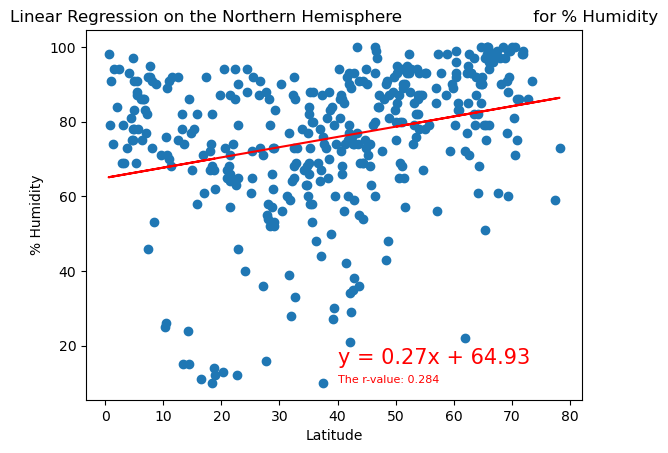

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,15))

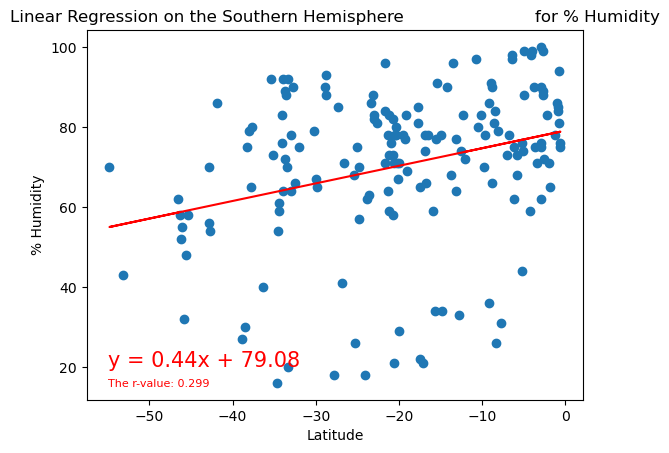

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,20))

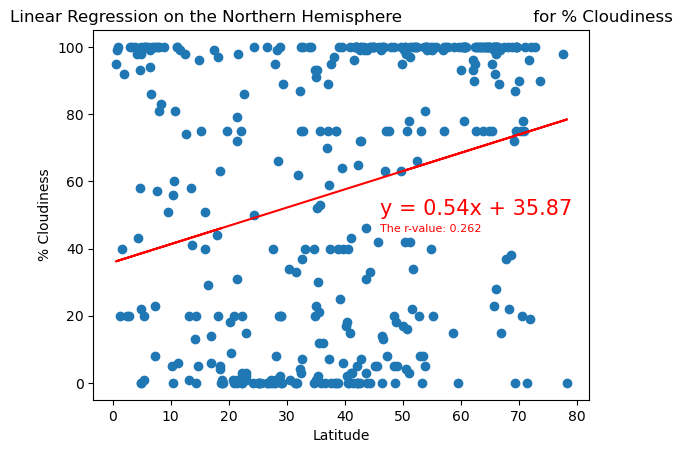

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(46,50))

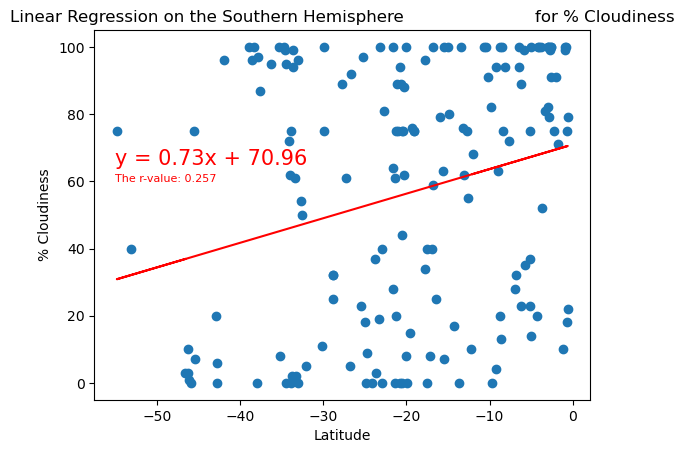

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,65))

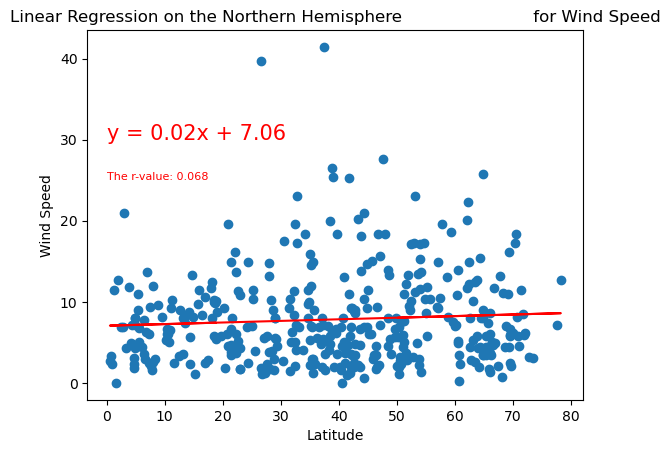

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,30))

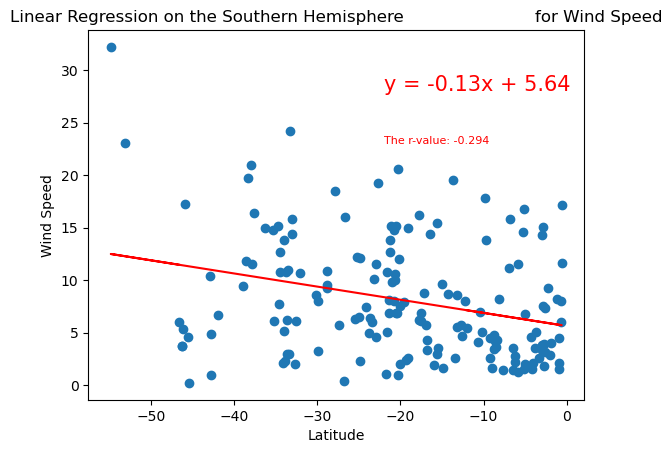

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-22,28))